# MTH9879 Homework 9

Assigned: April 25, 2017.
Due: May 9, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: 
* Notes:
    * Correction: the optimal trading rate given in Q1 (c):
    $$
    v^\star = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
    $$
    <font color=blue>
    Should be: 
    $$
    v^\star = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
    $$
    </font>
    
    * Q2:
        * Assume initial position is 10000
        * Only consider buy order (corresponding signed.trades is positive)

In [1]:
# Load libraries
library(repr)

### 1. (20 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture notes, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Does the optimal strategy depend on the stock price $S_t$?  Why not?  Write down the HJB equation for the resulting problem.

(b) Solve the first order condition to find the optimal trading rate $v^\star$.    

(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy
$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$

(d) With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

solve the HJB equaiton with the ansatz $\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$. Verify that the optimal trading rate is given by

$$
v^\star = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
$$
<font color=blue>
Should be: 
$$
v^\star = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
$$
</font>
with 

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$

(e) Define the characteristic time $T^\star$ as

$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$


Verify that the optimal trading strategy with liquidation horizon set to the characteristic time $T^\star$ is given by

$$
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
$$


### Answers of Q1

#### Answer of (a)

* Apply Ito's product rule (or trick of integration by part) to $S_tx_t$, we have:
$$
\begin{eqnarray*}
d(S_tx_t) &=& x_t dS_t + S_tdx_t + d[S_tx_t]\\
&=& x_t dS_t + S_tdx_t  (*)\\
&=& S_Tx_T - S_0x_0 (**)\\
&=& -S_0X
\end{eqnarray*}
$$
$\text{(*)}$: $d[S_tx_t]=0$, since we only consider buy(sell) if buy(sell) order <br>
$\text{(**)}$: $x_0=X, x_T=0$ <br>
$\Rightarrow$
$$
\begin{eqnarray*}
\int_0^T S_tdx_t &=& -S_0X+\int_0^T x_tdS_t\\
\mathbb{E}\left(\int_0^T S_tdx_t\right) &=& -S_0X+ \mathbb{E}\left(\int_0^T x_tdS_t\right)\\
&=& -S_0X
\end{eqnarray*}
$$

* Therefore, we have:
$$
\begin{eqnarray*}
\E[C]&=& \E\left(\int_0^T S_tdx_t -\eta \int_0^T v_tdx_t +\lambda \sigma \int_0^T x_t dt \right)\\
&=& -S_0X +\E\left(\eta \int_0^T {v_t}^2 dt + \lambda \sigma \int_0^T x_t dt \right) (*)\\
&=& -S_0X +\left(\eta \int_0^T {v_t}^2 dt + \lambda \sigma \int_0^T x_t dt \right)
\end{eqnarray*}
$$
where $v_t=-\dot{x_t}$<br>
$\Rightarrow$
The optimal strategy is:
$$
{C}(t,x)=\min_{v\in\mathcal G[t,T]}\left(\E(C)\right) = \min_{v\in\mathcal G[t,T]}\left(\eta \int_t^T {v_s}^2 ds + \lambda \sigma \int_t^T x_s ds \right)
$$


* Since $x_0=X, x_T=0$, we can see the optimal strategy above is determinstic, i.e., not depend on stock price $S_t$.


* Based on equation (3) in Lecture notes #9, we can write the HJB equation as following:
$$
\frac{\partial {C}}{\partial t} + \lambda\,\sigma\,x_t + \min_{v \in \mathcal{G}}\left\{-v\,{C}_x + \eta\,v^2\right\}=0
$$

#### Answer of (b)

* Denote $y=\left\{-v\,{C}_x + \eta\,v^2\right\}$


* Take the derivative of $y$ with respect to $v$, we have:
$$
v^\star = \frac{{C}_x}{2\eta}
$$

#### Answer of (c)

* Substitute $v^\star$ back to the HJB equation in (a), we have:
$$
\frac{\partial {C}}{\partial t} + \lambda\,\sigma\,x_t  -\frac{{C}_x}{2\eta}\,{C}_x + \eta \frac{{{C}_x}^2}{4\eta^2}=0
$$
$\Rightarrow$
$$
{C}_t=\frac{{{C}_x}^2}{4\eta}-\lambda \sigma x
$$
with $x_t=x$

#### Answer of (d)

* Since $C(t,x) = \eta\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$, we have:
$$
C_t=\eta \left[\dot{a(t)}x^2 +\dot{b(t)}x+\dot{c(t)}\right]\\
C_x=\eta \left[2a(t)x+b(t) \right]
$$


* Substitute these back to HJB equation in (c), we have:
$$
\frac{\eta^2 \left[4a^2(t)+b^2(t)+4a(t)b(t)\right]}{4\eta}-\lambda \sigma x -\eta \left[\dot{a(t)}x^2+\dot{b(t)}x+\dot{c(t)}\right]=0
$$
$\Rightarrow$
$$
\dot{a(t)}-a^2(t)=0\\
\eta\dot{b(t)}+\lambda \sigma -\eta a(t)b(t)=0\\
\dot{c(t)}-\frac{b^2(t)}{4}=0
$$
With the given terminal condition, 
$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$
We have:
$$
a(t)=\frac{1}{T-t} \\
b(t)=\frac{\lambda \sigma}{2\eta}(T-t)\\
c(t)=-\frac{\lambda^2\sigma^2}{48\eta^2}(T-t)^3
$$
Then 
$$
C(t,x)=\eta \left[\frac{1}{T-t}x^2+\frac{\lambda \sigma}{2\eta}(T-t) x-\frac{\lambda^2\sigma^2}{48\eta^2}(T-t)^3 \right]
$$


* The optimal trading rate then will be:
$$
\begin{eqnarray*}
v^\star &=& \frac{C_x}{2\eta}\\
&=& \frac{\eta\left[2a(t)x+b(t)\right]}{2\eta}\\
&=& {\frac{x}{T-t}+\frac{\lambda \sigma}{4\eta}(T-t)}\\
&=& {\frac{x}{T-t}+\frac{1}{4}\kappa (T-t)}
\end{eqnarray*}
$$
where $\kappa=\frac{\lambda \sigma}{\eta}$

#### Answer of (e)

* From Lecture #9, we have:<br><br>
The Euler-Lagrange equation:
$$\ddot x- A=0$$
with
$$A=\frac{\lambda\,\sigma}{2\,\eta}=\frac{\kappa}{2}$$


* With the boundary conditions $x_0=X$, $x_T=0$. The solution is then
$$x(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right)$$


* Given $T^\star =\sqrt{\frac{4X}{\kappa}} \,\rightarrow\, \frac{\kappa}{4}=\frac{X}{T^2}$, we have:
$$
\begin{eqnarray*}
x(t) &=& \left(X-\frac{\kappa T}{4}t\right)\left(1-\frac{t}{T}\right)\\
&=& \left(X-\frac{t}{T}X\right)\left(1-\frac{t}{T}\right)\\
&=& X\left(1-\frac{t}{T}\right)^2
\end{eqnarray*}
$$

## ABM and GBM

### Download MSFT data

In [2]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The *msft.bats* dataset from *MSFT130311.rData* contains all trades on the BATS exchange on 11-Mar-2013.  One trading days has 390 minutes.  Sample the  *msft.bats* dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?



### Answers of Q2

#### Answer of (a): Plots

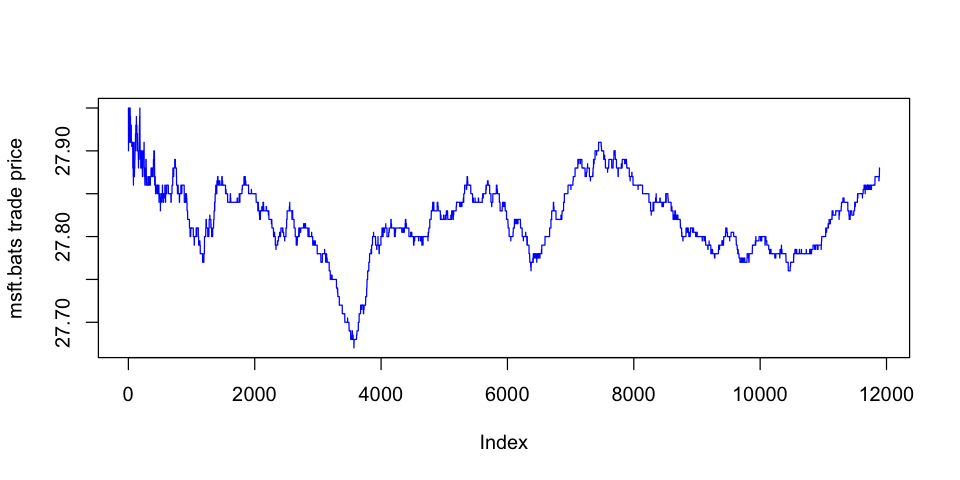

In [3]:
# Plot the msft.bats trade price to check outliers
options(repr.plot.height=4, repr.plot.width=8)
plot(msft130311.bats$trade.price,type = 'l',col="blue",ylab="msft.bats trade price")

Figure 1. Overview of msft.bats trade prices

In [4]:
# Retrive the dataset
df<- msft130311.bats
head(df)

signed.shares,trade.price
35,27.95
100,27.90
900,27.91
400,27.94
100,27.94
100,27.94


In [5]:
# Initialize the parameters
T<- 390  # One day trading time: 390mins
X<- 10000  # Assume the initial position X=10000

# Get the cumulative sum of trade positions
# Since the model only consider buy if buy order or sell if sell order
# Adjust all the positions to be buy order, i.e., positive signs
# Only select the positive positions (buy order)
subdf<- subset(df,signed.shares>=0)
subdf$cumshares<- cumsum(subdf$signed.shares)


# Total number and total volume of trades
num_trades<- length(subdf$cumshares)
tol_vol<- subdf$cumshares[num_trades] # The last element of cumulative shares is the total shares



# Sample the msft.bats dataset evenly, roughly every minute of volume time
samples<- seq(1,tol_vol,tol_vol/T)

# Sample indices
sample_ind<- c(1:length(samples))

# Compare the cumulative sum of shares with samples
j<- 1
for(i in 1:num_trades){
    if(subdf$cumshares[i]>samples[j] && j<=length(samples)){
        sample_ind[j]<- i
        j<- j+1
    }
}

# Construct the price path S_t based on the indices above and trade.price in msft.bats
price_path<- subdf[sample_ind,'trade.price']

# Calculate the trading rate under ABM and GBM
# x_t=X(1-t/T)^2
# Trival list for future using
v_ABM<- c(1:T)
v_GBM<- c(1:T)
# Initial price
S0<- price_path[1]
# Position sizes under ABM and GBM
x_ABM<- c(0:T)
x_GBM<- c(0:T)
x_ABM[1]<- X # Initial position
x_GBM[1]<- X # Initial position

for (t in 1: T){
    v_ABM[t]<- (x_ABM[t])/(T-t) + X*(1-t/T)/T  # optimal trading rate v of ABM
    x_ABM[t+1]<- max(x_ABM[t]-v_ABM[t],0)    # The position next step under ABM
    
    v_GBM[t]<- (x_GBM[t])/(T-t) + X*price_path[t]*(1-t/T)/(T*S0)  # optimal trading rate v of ABM
    x_GBM[t+1]<- max(x_GBM[t]-v_GBM[t],0)  # The position next step under GBM
}


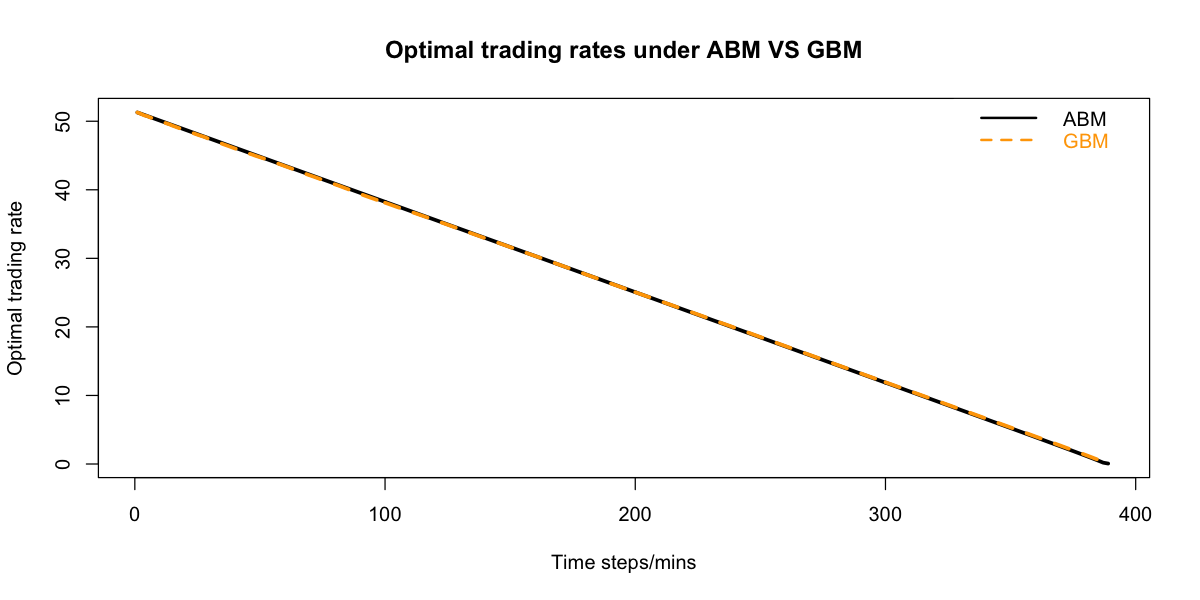

In [6]:
# Plot the optimal trading rate under ABM and GBM
options(repr.plot.height=5, repr.plot.width=10)
plot(1:T,v_ABM,xlab='Time steps/mins',ylab='Optimal trading rate',
    main='Optimal trading rates under ABM VS GBM',type='l',col='black',lwd=3)
lines(1:T,v_GBM,lty=2,col='orange',lwd=3)
legend('topright',c('ABM','GBM'),lty=c(1,2),col=c('black','orange'),lwd=2,
      text.col=c('black','orange'),y.intersp=1.5,cex=1, inset=0.003,box.col='white')

Figure 2. Optimal trading rates under ABM and GBM. Notes: they are very close

#### Answer of (b): Maximum percentage deviation of position sizes

In [7]:
# Compute the deviation between two position sizes
dev<- (x_GBM-x_ABM)*100/X
dev<- dev[-length(dev)]  # Avoid the last element - NaN
cat("The maximum percentage deviation of position sizes is: ",round(max(abs(dev)),9),"%","\n")
cat("The maximum percentage deviation is so small that is not significant.")

The maximum percentage deviation of position sizes is:  0.121514 % 
The maximum percentage deviation is so small that is not significant.

## Kratz and Schöneborn with time-averaged VaR risk charge

### 3. (12 points)

(a) Repeat the computation of the optimal strategy from the lecture notes with time-averaged VaR

$$
\lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

as the risk term (rather than the quadratic variation $\lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$).  Show that the optimal position

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
and deduce the optimal trading rate $v^\star(t)$.

(b) By Taylor-expanding the solution around $\theta=0$, show that we retrieve the solution derived in the slides with no dark pool

$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right) .
$$

in the limit $\theta \to 0$.


### Answers of Q3

#### Answer of (a)

* With time-averaged VaR as risk term, then the expected risk-adjusted cost is then given by

$$
\begin{eqnarray*}
\E[C] &=& \E \left[\eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma\,\int_0^T\,x_t\,dt\right]\\
\end{eqnarray*}
$$


* In this case, the expected risk-adjusted cost is then adjusted to the following:
$$
\begin{eqnarray*}
\E[C] &=& \E \left[\left(\eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma\,\int_0^T\,x_t\,dt\right)1_{t<t^{\star}}\right]\\
&=& \eta \, \E\left[\int_0^T \left({\dot x}_t^2+\frac{\lambda \sigma}{\eta} x_t \right)1_{t<t^{\star}}dt \right]\\
&=& \eta \, \E \left[\int_0^T \left({\dot x}_t^2+\frac{\lambda \sigma}{\eta} x_t \right)e^{-\theta t}dt \right]\\
&=& \eta \, \E \left[\int_0^T \left({\dot x}_t^2 e^{-\theta t}+\frac{\lambda \sigma}{\eta} e^{-\theta t} x_t \right)dt \right]\\
\end{eqnarray*}
$$


* Apply the Euler-lagrange equation to the above equation, we have:
$$
\frac{d}{dt}(2\dot{x}_te^{-\theta t}) - \frac{\lambda\sigma}{\eta}e^{-\theta t} = 0 
$$
$\Rightarrow$
$$
2\ddot{x}_t e^{-\theta t} - 2\theta\dot{x}_te^{-\theta t}- \frac{\lambda\sigma}{\eta}e^{-\theta t} = 0 
$$
$\Rightarrow$
$$
\ddot{x}_t - \theta\dot{x}_t - \frac{\lambda\sigma}{2\eta} = 0
$$


* With terminal condition, $x_0=X, x_T=0$, we can solve the above ODE to get the result as:
$$ 
x^\star(t)=\left(X-\frac{\lambda \sigma\, T}{2\eta \theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{\lambda \sigma }{2\eta \theta }\,(T-t) 
$$


* Denote $A=\frac{\lambda \sigma}{2\eta}$, we have:
$$ 
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t) 
$$

* Then the corresponding optimal trading rate is:
$$
v^\star(t)=-\dot{x}^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{\theta e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }
$$

#### Answer of (b): Taylor expansion

* Denote $f(\theta)=1-e^{-\theta (T-t)}$, and $g(\theta)=1-e^{-\theta T}$, then we have:
$$
f(0)=0\\
f'(\theta)=(T-t)e^{-\theta (T-t)} \,\rightarrow \, f'(0)=(T-t)\\
f''(\theta)=-(T-t)^2e^{-\theta (T-t)} \,\rightarrow \, f''(0)=-(T-t)^2\\
f^{(3)}(\theta)=(T-t)^3e^{-\theta (T-t)} \,\rightarrow \, f^{(3)}(0)=(T-t)^3\\
...\\
f^{(n)}(\theta)=(-1)^{n+1}(T-t)^ne^{-\theta (T-t)} \,\rightarrow \, f^{(n)}(0)=(-1)^{n+1}(T-t)^n\\
$$
Similary, for $g(\theta)$, we have:
$$
g(0)=0\\
g'(\theta)=Te^{-\theta T} \,\rightarrow \, g'(0)=T\\
g''(\theta)=-T^2e^{-\theta T} \,\rightarrow \, g''(0)=-T^2\\
g^{(3)}(\theta)=T^3e^{-\theta T} \,\rightarrow \, g^{(3)}(0)=T^3\\
...\\
g^{(n)}(\theta)=(-1)^{n+1}T^ne^{-\theta T} \,\rightarrow \, g^{(n)}(0)=(-1)^{n+1}T^n\\
$$


* Based on the fomula of Taylor expansion and by choosing the 1st and 2nd order of Taylor series for approximation, then we have:
$$
1-e^{-\theta(T-t)} \approx (T-t)\theta -\frac{(T-t)^2}{2}\theta^2 \\
1-e^{-\theta T} \approx T \theta - \frac{T^2}{2}\theta^2
$$
$\Rightarrow$
$$
\begin{eqnarray*}
x^\star(t)&=& \left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{ \theta }\,(T-t) \\ 
&\approx&\left(X-\frac{A\, T}{ \theta }\right)\,\frac{(T-t)\theta-\frac{1}{2}(T-t)^2\theta^2}{T\theta-\frac{1}{2}T^2\theta^2}+\frac{A }{ \theta }\,(T-t) \\
&=& X\frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T-\frac{1}{2}T^2\theta} - \frac{AT}{\theta}\frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T-\frac{1}{2}T^2\theta} + \frac{A(T-t)}{\theta}\\
&=& X\frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T-\frac{1}{2}T^2\theta} +\frac{A(T-t)}{\theta} - \frac{A(T-t)\left(1-\frac{T-t}{2}\theta\right)}{\theta \left(1-\frac{1}{2}T\theta\right)}\\
&=& X\frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T-\frac{1}{2}T^2\theta} - A(T-t)\frac{\frac{1}{2}t}{1-\frac{1}{2}T\theta}\\
&\underset{lim\,\theta \rightarrow0}\approx& X\left(1-\frac{t}{T}\right)-\frac{ATt}{2}\left(1-\frac{t}{T}\right)\\
&\underset{lim\,\theta \rightarrow0}=& \left(X-\frac{AT}{2}t\right)\left(1-\frac{t}{T}\right)
\end{eqnarray*}
$$